# Financial indicators

https://www.allthesnippets.com/notes/finance/calculating_cumulative_returns_of_stocks_with_python_and_pandas.html
https://www.codingfinance.com/post/2018-04-03-calc-returns-py/
https://im-coder.com/die-berechnung-der-kumulierten-renditen-mit-pandas-dataframe.html


In [58]:
import talib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## Data - One coin

In [13]:
df = pd.read_csv('/Users/nat.walentynowicz/Desktop/doge_price_gt_0410-2611.csv')

In [14]:
print(df.shape)
df.head()

(1289, 4)


,Unnamed: 0,ds,searches,y
0,0,2021-10-04 21:00:00,80,0.207647
1,1,2021-10-04 22:00:00,65,0.205658
2,2,2021-10-04 23:00:00,75,0.207247
3,3,2021-10-05 00:00:00,67,0.208338
4,4,2021-10-05 01:00:00,58,0.211761


## Technical Indicators

### Calculating the daily returns for individual stock

In [30]:
# daily return:
daily_returns = df['y'].pct_change(24)

In [31]:
daily_returns

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1284   -0.111137
1285   -0.075667
1286   -0.090626
1287   -0.104840
1288   -0.098488
Name: y, Length: 1289, dtype: float64

In [48]:
cum_daily_returns = df['y'].pct_change(120)

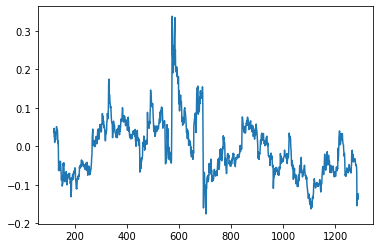

In [50]:
plt.plot(cum_daily_returns)

### Moving average (short term)

In [65]:
df["MA10_days"] = df["y"].rolling(window=240).mean()

In [66]:
df["MA30_days"] = df["y"].rolling(window=720).mean()

In [67]:
df["MAshort_over_long"] = df["MA10_days"] > df["MA30_days"]

In [70]:
df["MAshort_over_long"].value_counts()

False    928
True     361
Name: MAshort_over_long, dtype: int64

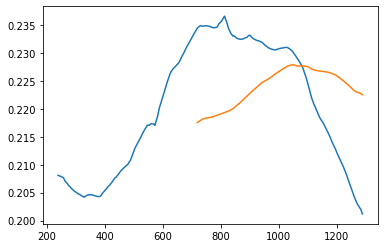

In [71]:
plt.plot(df["MA10_days"])
plt.plot(df["MA30_days"])

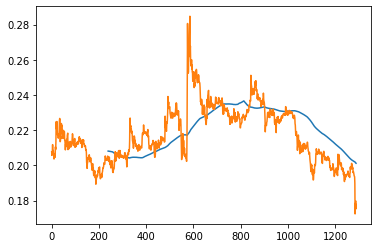

In [62]:
plt.plot(SMA)
plt.plot(df["y"])

In [101]:
df["5_day_change"] = abs(df['y'][::-1].pct_change(120))[::-1]

In [102]:
df["5_day_change"].value_counts()

0.035292    1
0.032791    1
0.031556    1
0.005193    1
0.019263    1
           ..
0.025222    1
0.047956    1
0.049829    1
0.047835    1
0.140042    1
Name: 5_day_change, Length: 1169, dtype: int64

(array([215., 337., 295., 169.,  81.,  27.,  25.,  14.,   3.,   3.]),
 array([5.92413751e-05, 2.52866261e-02, 5.05140108e-02, 7.57413955e-02,
        1.00968780e-01, 1.26196165e-01, 1.51423550e-01, 1.76650934e-01,
        2.01878319e-01, 2.27105704e-01, 2.52333088e-01]),
 <BarContainer object of 10 artists>)

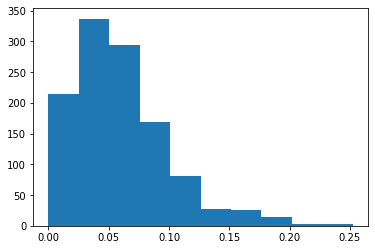

In [103]:
plt.hist(df["5_day_change"])

In [104]:
df["y_alternate"] = df["5_day_change"]>0.1

In [105]:
df["y_alternate"].value_counts()

False    1129
True      160
Name: y_alternate, dtype: int64